In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
from ipywidgets import interact
import folium

In [3]:
from google.colab import files
Ufiles=files.upload()

Saving fatalities_isr_pse_conflict_2000_to_2023.csv to fatalities_isr_pse_conflict_2000_to_2023.csv


# Import Data

---



---



In [4]:
data = pd.read_csv(r'fatalities_isr_pse_conflict_2000_to_2023.csv')

In [5]:
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


# Data Understanding

---



---



In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

In [7]:
print(f'Jumlah data {data.shape[0]} dengan jumlah kolom {data.shape[1]}')

Jumlah data 11124 dengan jumlah kolom 16


In [8]:
for column in data.columns:
  if data[column].isna().any():
    if data[column].eq(0).any():
      print(f'tidak ada data kosong')
    else:
      print(f'terdapat data kosong pada **{column}**  dengan type **{data[column].dtype}**')


terdapat data kosong pada **age**  dengan type **float64**
terdapat data kosong pada **gender**  dengan type **object**
terdapat data kosong pada **took_part_in_the_hostilities**  dengan type **object**
terdapat data kosong pada **place_of_residence**  dengan type **object**
terdapat data kosong pada **place_of_residence_district**  dengan type **object**
terdapat data kosong pada **type_of_injury**  dengan type **object**
terdapat data kosong pada **ammunition**  dengan type **object**
terdapat data kosong pada **notes**  dengan type **object**


In [9]:
for column in data.columns:
    if data[column].dtype == 'object':
        if data[column].isna().any():
            mode_data = data[column].mode().iloc[0]
            data[column].fillna(mode_data, inplace=True)


In [10]:
for column in data.columns:
  if data[column].isna().any():
    if data[column].eq(0).any():
      print(f'tidak ada data kosong')
    else:
      print(f'terdapat data kosong pada **{column}**  dengan type **{data[column].dtype}**')


terdapat data kosong pada **age**  dengan type **float64**


In [11]:
mean_data = data['age'].mean()
data['age']=data['age'].fillna(mean_data)

In [12]:
data.isna().sum()

name                            0
date_of_event                   0
age                             0
citizenship                     0
event_location                  0
event_location_district         0
event_location_region           0
date_of_death                   0
gender                          0
took_part_in_the_hostilities    0
place_of_residence              0
place_of_residence_district     0
type_of_injury                  0
ammunition                      0
killed_by                       0
notes                           0
dtype: int64

In [13]:
print(f' terdapat data {data.duplicated().sum()} duplikat')

 terdapat data 7 duplikat


In [14]:
data.drop_duplicates(inplace=True)


In [15]:
print(f' terdapat data {data.duplicated().sum()} duplikat')

 terdapat data 0 duplikat


# Statistika Dasar

---
---



In [16]:
data.describe()

,age
count,11117.000000
mean,26.745703
std,13.704717
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [17]:
data.describe(include='object').T

,count,unique,top,freq
name,11117,11083,Name unknown to B'Tselem,16
date_of_event,11117,2405,2008-12-27,357
citizenship,11117,4,Palestinian,10085
event_location,11117,494,Gaza City,2232
event_location_district,11117,20,Gaza,2434
event_location_region,11117,3,Gaza Strip,7731
date_of_death,11117,2593,2008-12-27,341
gender,11117,2,M,9694
took_part_in_the_hostilities,11117,5,No,6083
place_of_residence,11117,580,Gaza city,2344


# Features Engineering
---

----

In [18]:
dff = data.copy()

In [19]:
for column in dff.columns:
  if dff[column].dtype == 'object':
    dff[column]=dff[column].astype('category')

In [20]:
dff.dtypes

name                            category
date_of_event                   category
age                              float64
citizenship                     category
event_location                  category
event_location_district         category
event_location_region           category
date_of_death                   category
gender                          category
took_part_in_the_hostilities    category
place_of_residence              category
place_of_residence_district     category
type_of_injury                  category
ammunition                      category
killed_by                       category
notes                           category
dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

dff['gender']=le.fit_transform(dff['gender'])

In [23]:
for column in dff.columns:
    if dff[column].dtype in ['category', 'float64']:
        if dff[column].nunique() > 2:
            dummies = pd.get_dummies(dff[column], prefix=column, drop_first=True)
            dff = pd.concat([dff, dummies], axis=1)
            dff.drop(column, axis=1, inplace=True)

In [ ]:
dff.head()

,age,gender,name_'Abd Rabo Dib 'Abd Rabo al-'Assar,name_'Abd Rabo Iyad 'Abd Rabo al-Astal,name_'Abd Rabo Jamal Ayub a-Shanbari,name_'Abd Rabo Khaled 'Abd Rabo Abu Hilu,name_'Abd Rabo Shaybub Ahmad a-Shanbari,name_'Abd a-Dayem Isma'il 'Abd a-Dayem Abu Msameh,name_'Abd a-Latif 'Othman Muhammad A'beid,name_'Abd a-Latif Muhammad Muhammad a-Na'uq,...,"notes_ Killed in battle in the neighborhood of a-Shuja'iyeh. According to a statement by the IDF Spokesperson, he was killed with two other soldiers when an anti-tank missile hit the house they were in. Ten other soldiers were killed at the same spot that day.","notes_ Killed in battle in the neighborhood of a-Shuja'iyeh. According to media reports, he was killed with another soldier during a gun battle with Palestinian military branch operatives. Eleven other soldiers were killed at the same spot that day.",notes_ Killed in battle in the neighborhood of a-Shuja'iyeh. He was shot in a gun battle with Palestinian military branch operatives. Twelve other soldiers were killed at the same spot that day.,"notes_ Killed together with another soldier. According to a statement by the IDF Spokesperson, they were killed by IEDs in the neighborhood of a-Shuja'iyeh.",notes_ Killed when an anti-tank missile hit the armored vehicle he was riding in.,"notes_ Killed with another soldier. According to media reports, they were killed in a gun battle with Palestinian military branch operatives.","notes_ Shot dead in the Central District of the Gaza Strip. According to a statement by the IDF Spokesperson, he was shot by a military branch operative who emerged from a tunnel.","notes_ Sustained critical gunshot wounds in a gun battle with military branch operatives. According to a statement by the IDF Spokesperson, the incident took place in the southern Gaza Strip.",notes_בכיר בזרוע הצבאית של חמאס. נהרג בביתו. גופתו נמצאה ב-19.5.21.,notes_נהרג יחד עם פעיל בזרוע הצבאית של חמאס כשהיו ליד תחנת דלק אל-ח'וזונדאר במערב ג'באליא.
0,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analyst
---
---

In [24]:
data['date_of_event'] =pd.to_datetime(data['date_of_event'])
data['date_of_death'] =pd.to_datetime(data['date_of_death'])

In [25]:
data.dtypes

name                                    object
date_of_event                   datetime64[ns]
age                                    float64
citizenship                             object
event_location                          object
event_location_district                 object
event_location_region                   object
date_of_death                   datetime64[ns]
gender                                  object
took_part_in_the_hostilities            object
place_of_residence                      object
place_of_residence_district             object
type_of_injury                          object
ammunition                              object
killed_by                               object
notes                                   object
dtype: object

In [26]:
data.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes'],
      dtype='object')

# Distribusi Kematian berdasarkan kejadian
---
---

In [45]:
fatality_by_year = data.groupby(data['date_of_event'].dt.year).size().reset_index(name='fatalities')

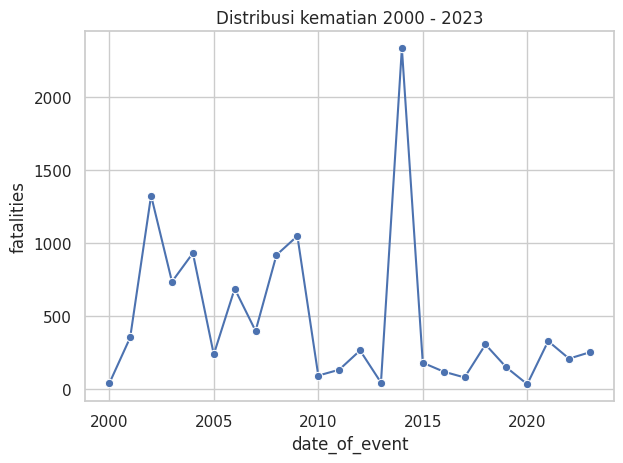

In [46]:
sns.set(style='whitegrid')
sns.lineplot(fatality_by_year, x='date_of_event',y='fatalities', marker ='o')
plt.title('Distribusi kematian 2000 - 2023')
plt.tight_layout()
plt.show()

Grafik diatas menunjukan:

* Terjadi lonjakan jumlah kematian yang sangat drastis sekitar pada tahun 2002 dan 2014
* Penurunan jumlah kematian sekitar tahun 2010 dan tahun 2015
* Setelah tahun 2015, jumlah kematian menurun dan tetap relatif stabil hingga sekitar tahun 2018.

# Distribusi Kematian berdasarkan Umur
---
---

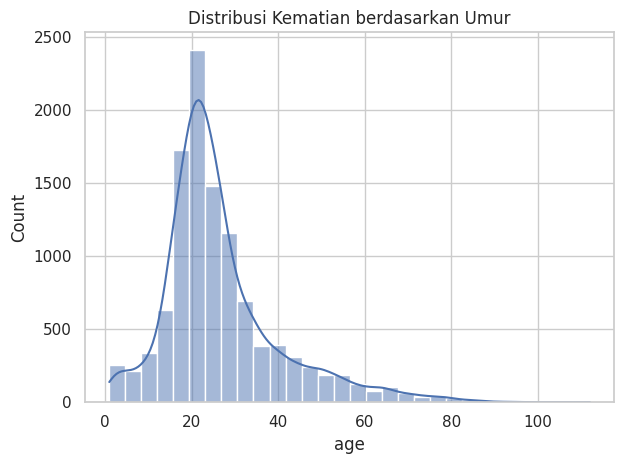

In [47]:
sns.histplot(data =data, x='age', bins = 30, kde = True)
plt.title('Distribusi Kematian berdasarkan Umur')
plt.tight_layout()
plt.show()

Histogram di atas memperlihatkan distribusi usia korban kematian:

* Sejumlah besar kematian terjadi di kalangan individu yang berusia akhir remaja hingga awal 20 -an.
* Terdapat penurunan yang terlihat dalam jumlah kematian seiring bertambahnya usia, dengan jumlah kematian yang lebih sedikit di kalangan individu yang lebih tua.
* Terdapat pula puncak kecil dalam jumlah kematian di kalangan individu yang sangat muda, kemungkinan anak-anak.

# Distribusi Kematian berdasarkan jenis Kelamin
---
---

In [51]:
gender_distribusi = data['gender'].value_counts().rename('fatalities')
gender_df=gender_distribusi.reset_index()
gender_df.column = ['Gender','Number of Fatalities' ]

<ipython-input-51-049c0317a05a>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  gender_df.column = ['Gender','Number of Fatalities' ]


In [52]:
gender_df

,index,fatalities
0,M,9694
1,F,1423


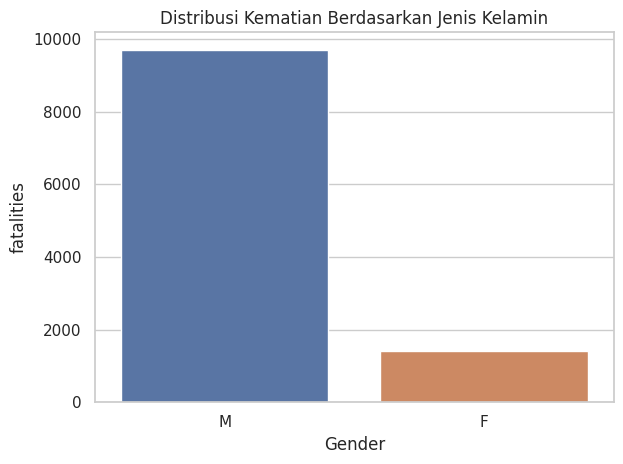

In [ ]:
sns.barplot(gender_df, x='index',y='fatalities')
plt.xlabel('Gender')
plt.title('Distribusi Kematian Berdasarkan Jenis Kelamin')
plt.tight_layout()
plt.show()

Diagram batang menggambarkan distribusi jenis kelamin korban kematian:

* Sebagian besar korban kematian adalah laki-laki.
* Jumlah korban kematian perempuan jauh lebih rendah dibandingkan dengan laki-laki.

# Disribusi Kematian Berdasarkan citizenship
---
---

In [54]:
ctz_dist = data['citizenship'].value_counts().rename('Fatalities').reset_index()
ctz_dist

,index,Fatalities
0,Palestinian,10085
1,Israeli,1029
2,Jordanian,2
3,American,1


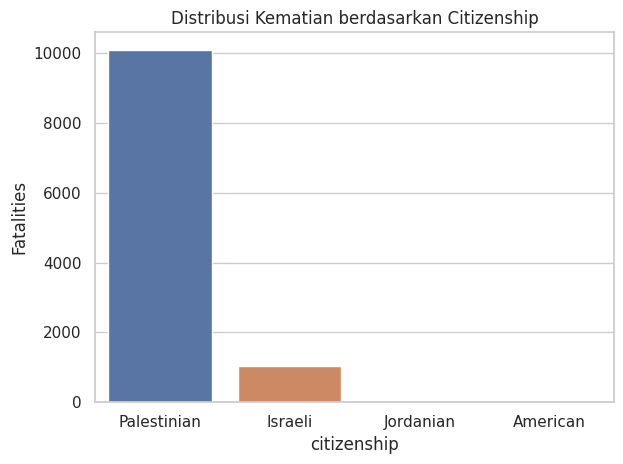

In [55]:
sns.barplot(ctz_dist, x='index',y='Fatalities')
plt.title('Distribusi Kematian berdasarkan Citizenship')
plt.xlabel('citizenship')
plt.tight_layout()
plt.show()

Diagram batang di atas memberikan wawasan tentang distribusi kewarganegaraan korban kematian:

* Sebagian besar korban kematian adalah warga Palestina.

# Distribusi Kematian Berdasarkan Region
---
---

In [56]:
dist_reg = data['event_location_region'].value_counts().rename('Fatalities').reset_index()


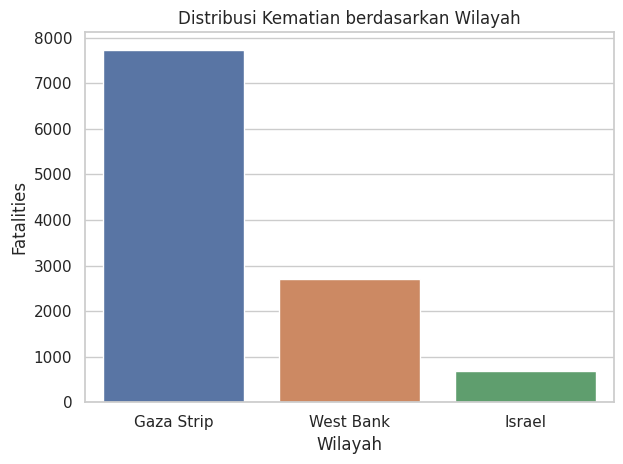

In [57]:
sns.barplot(dist_reg, x='index',y='Fatalities')
plt.title('Distribusi Kematian berdasarkan Wilayah')
plt.xlabel('Wilayah')
plt.tight_layout()
plt.show()

Diagram batang memperlihatkan distribusi korban kematian berdasarkan wilayah:

* Jalur Gaza memiliki jumlah korban kematian tertinggi, diikuti oleh Tepi Barat.
* Wilayah lain memiliki jumlah korban kematian yang cukup lebih sedikit dibandingkan.

# Distribusi Kematian Berdasarkan District
---
---

In [58]:
dist_di = data['event_location_district'].value_counts().rename('Fatalities').reset_index()

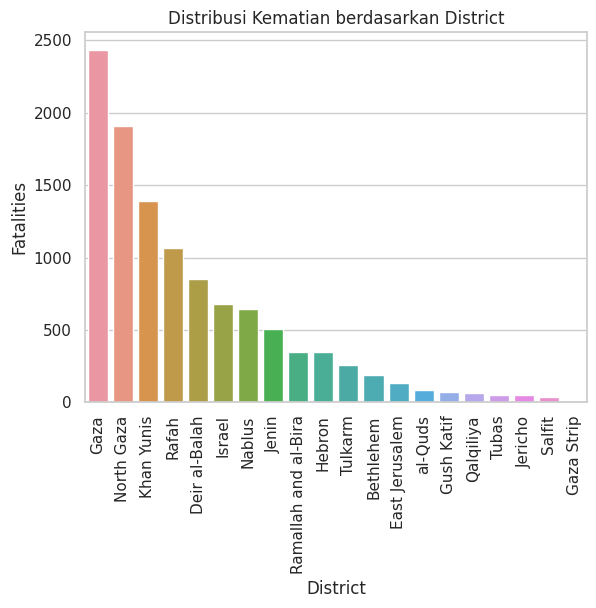

In [59]:
sns.barplot(dist_di, x='index',y='Fatalities')
plt.title('Distribusi Kematian berdasarkan District')
plt.xlabel('District')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()

Diagram batang menyajikan distribusi korban kematian berdasarkan distrik:

* Distrik Gaza, Hebron, dan Jenin memiliki jumlah korban kematian tertinggi.
* Distrik lain juga memiliki jumlah yang signifikan, dengan Nablus, Ramallah, dan Bethlehem mengikuti dengan cermat.
* Beberapa distrik, seperti Jericho, memiliki jumlah korban kematian yang lebih sedikit dibandingkan dengan yang lain.

# Distribusi Kematian berdasarkan Partisipasi dalam Pertempuran
---
---

In [61]:
participation_distribution = data['took_part_in_the_hostilities'].value_counts().rename('Fatalities').reset_index()

Diagram batang menampilkan distribusi berdasarkan apakah individu tersebut ikut serta dalam pertikaian:

Sejumlah besar korban kematian melibatkan individu yang tidak ikut serta dalam pertikaian.
Jumlah korban kematian di kalangan mereka yang ikut serta dalam pertikaian lebih rendah.

In [67]:
participation_distribution_gender = data.groupby(['took_part_in_the_hostilities'])['gender'].value_counts().rename('Fatalities').reset_index()

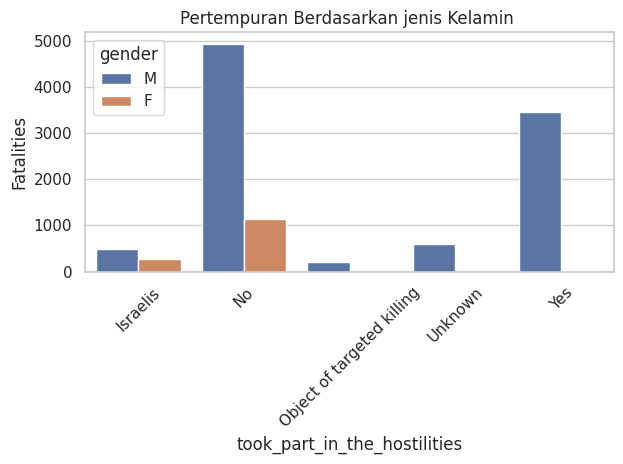

In [74]:
sns.barplot(data = participation_distribution_gender, x='took_part_in_the_hostilities', y='Fatalities', hue='gender')
plt.title('Pertempuran Berdasarkan jenis Kelamin ')
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

Pada hasil diatas Kematian bedasarkan ke ikut sertaan berperang adalah jenis kelamin laki - laki

# Distribusi Kematian berdasarkan Cidera
---
---

In [86]:
por  = data['type_of_injury'].value_counts().reset_index(name='Fatalities')


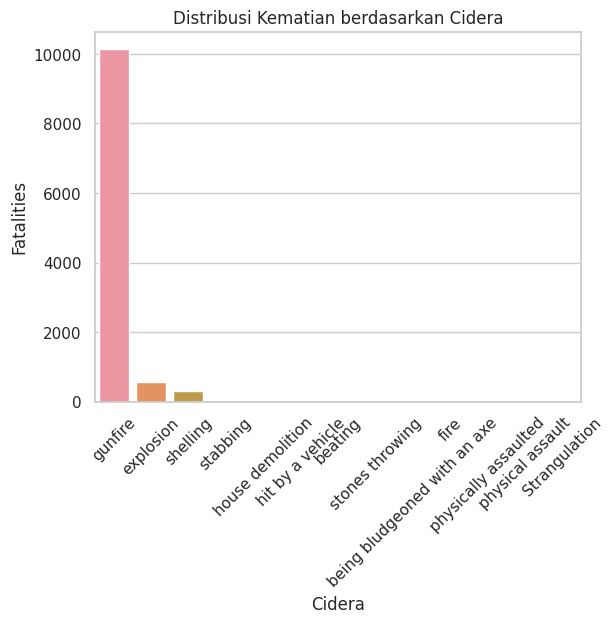

In [89]:
sns.barplot(por, x='index',y='Fatalities')
plt.title('Distribusi Kematian berdasarkan Cidera')
plt.xlabel('Cidera')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

Diagram batang memperlihatkan distribusi berbagai jenis cedera:

* Tembakan adalah jenis cedera yang dominan, menyumbang sebagian besar dari total korban kematian.
* Jenis cedera lain, seperti akibat ledakan atau serangan misil, hadir tetapi dalam jumlah yang jauh lebih kecil.

# Kematian Berdasarkan **Jenis** Amunisi yang Digunakan
---
---

In [90]:
ammunition  = data['ammunition'].value_counts().reset_index(name='Fatalities')

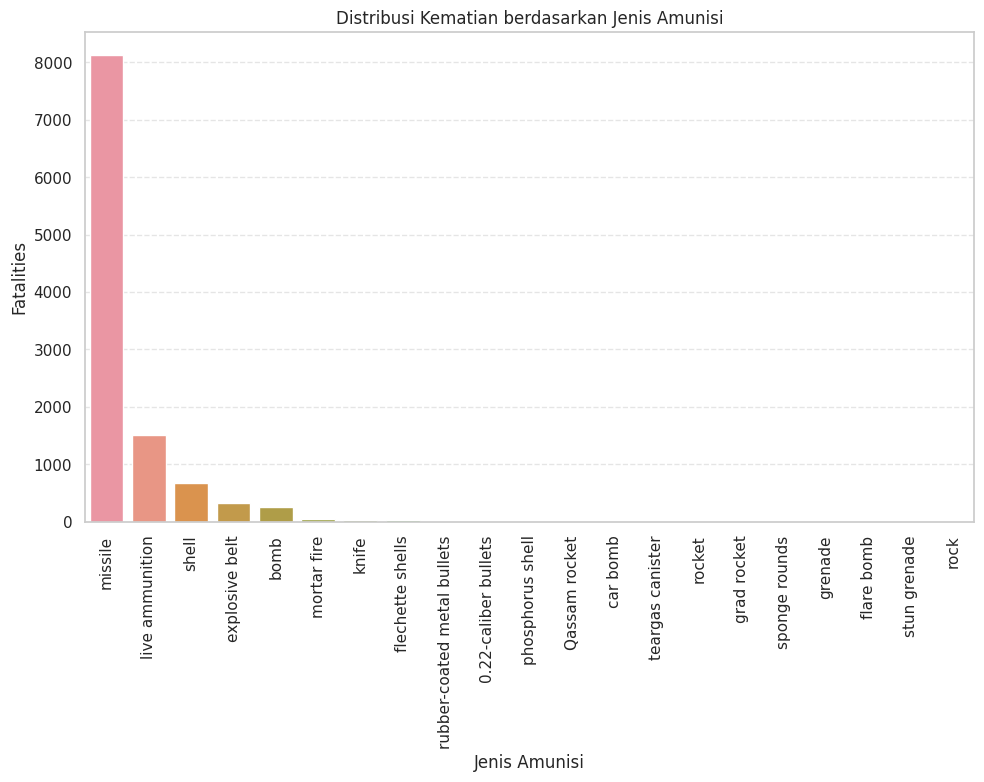

In [96]:
plt.figure(figsize=(10,6))
sns.barplot(ammunition, x='index',y='Fatalities')
plt.title('Distribusi Kematian berdasarkan Jenis Amunisi')
plt.xlabel('Jenis Amunisi')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.grid(axis='y', linestyle='--', alpha =0.5)
plt.show()

Diagram batang menampilkan distribusi berdasarkan jenis amunisi yang digunakan:

Amunisi hidup jauh lebih umum digunakan, menyebabkan sebagian besar dari total korban kematian.
Jenis amunisi lain, seperti peluru berlapis karet dan gas air mata, juga menyebabkan korban kematian tetapi kurang umum dibandingkan dengan amunisi hidup.

# Kematian Berdasarkan Entitas yang Bertanggung Jawab
---
---

In [97]:
entitas  = data['killed_by'].value_counts().reset_index(name='Fatalities')

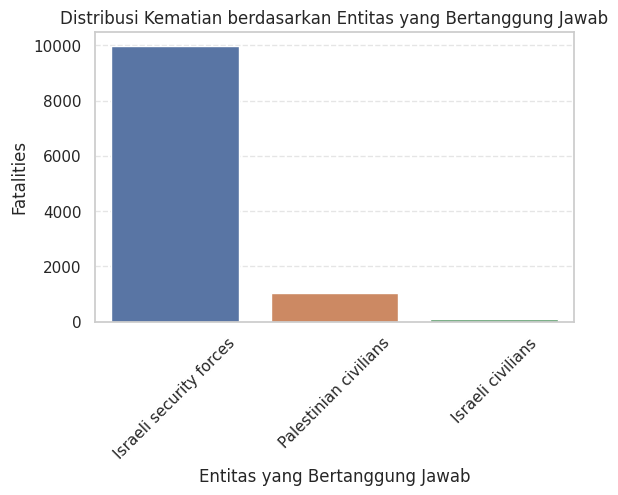

In [100]:
plt.figure(figsize=(6,4))
sns.barplot(entitas, x='index',y='Fatalities')
plt.title('Distribusi Kematian berdasarkan Entitas yang Bertanggung Jawab')
plt.xlabel('Entitas yang Bertanggung Jawab')
plt.tight_layout()
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha =0.5)
plt.show()

# Distribusi Kematian berdasarkan Kelompok Usia
---
---

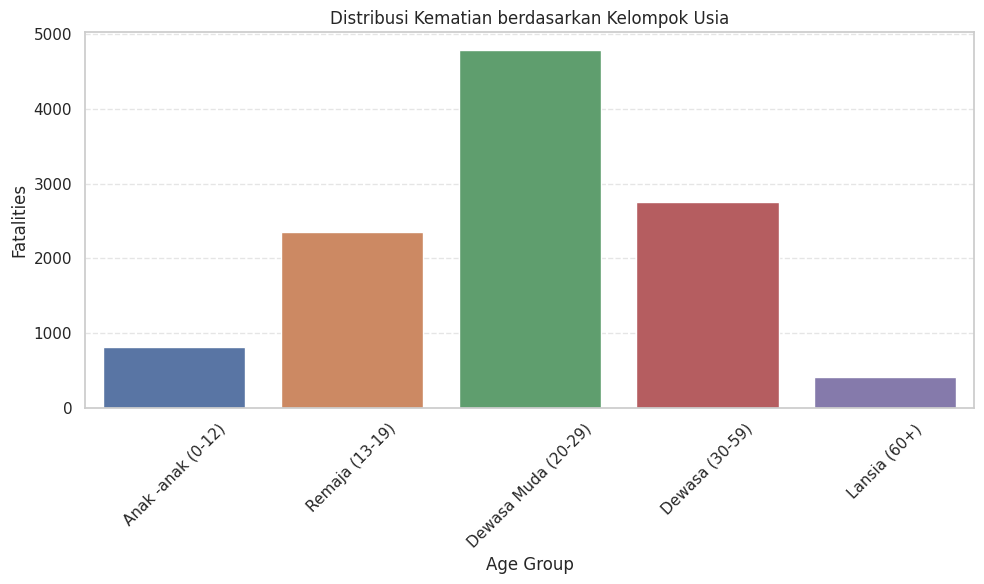

In [118]:
# kategori umur kedalam group
bins = [0, 12, 19, 29, 59, 100]
labels = ['Anak -anak (0-12)', 'Remaja (13-19)', 'Dewasa Muda (20-29)', 'Dewasa (30-59)', 'Lansia (60+)']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=True)


# kalkulasi umur pada distribusi
age_group_distribution = data['age_group'].value_counts().reset_index(name='Fatalities')

plt.figure(figsize=(10,6))
sns.barplot(age_group_distribution, x='index', y='Fatalities')
plt.xticks(rotation=45)
plt.title('Distribusi Kematian berdasarkan Kelompok Usia')
plt.xlabel('Age Group')
plt.tight_layout()
plt.grid(axis='y',linestyle='--', alpha =0.5)
plt.show()

Diagram batang memperlihatkan distribusi korban kematian berdasarkan kelompok usia:

Dewasa Muda (20-29 tahun) menyumbang jumlah korban kematian tertinggi.
Dewasa (30-59 tahun) dan Remaja (13-19 tahun) mengikuti dengan cermat, menunjukkan jumlah korban kematian yang signifikan di kelompok usia ini.
Anak-anak (0-12 tahun) dan Lansia (60 tahun ke atas) memiliki jumlah korban kematian yang lebih rendah dibandingkan.

# Distribusi Kematian menurut Jenis Kelamin dan Kewarganegaraan
---

---

In [119]:
gender_city  = data.groupby(['citizenship'])['gender'].value_counts().reset_index(name='Fatalities')

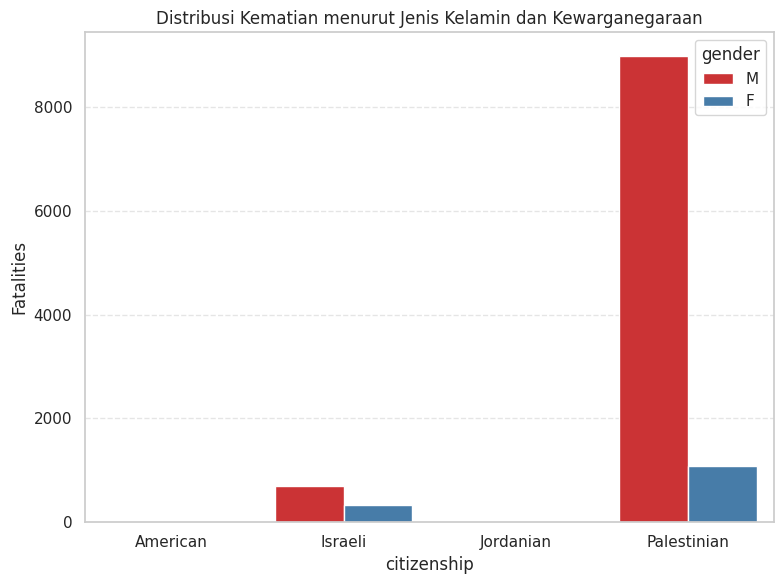

In [131]:
plt.figure(figsize=(8,6))
sns.barplot(gender_city, x='citizenship', y='Fatalities', hue='gender', palette='Set1')
plt.title('Distribusi Kematian menurut Jenis Kelamin dan Kewarganegaraan')
plt.xlabel('citizenship')
plt.tight_layout()
plt.grid(axis='y',linestyle='--', alpha =0.5)
plt.show()

# 10 Tempat Tinggal Paling Umum di Antara Korban
---
---

In [136]:
residence_distribution = data['place_of_residence'].value_counts().reset_index(name='Fatalities').head(10)

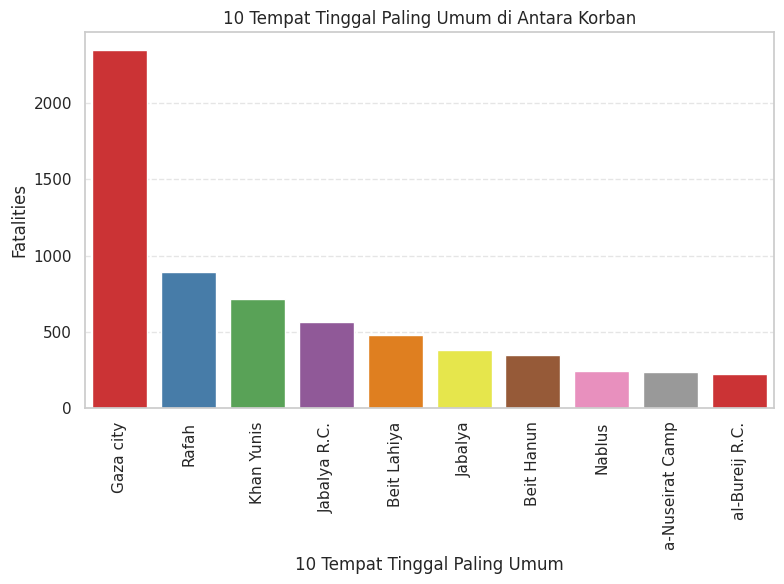

In [142]:
plt.figure(figsize=(8,6))
sns.barplot(data = residence_distribution, x='index', y='Fatalities', palette='Set1')
plt.title('10 Tempat Tinggal Paling Umum di Antara Korban')
plt.xlabel('10 Tempat Tinggal Paling Umum')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(axis='y',linestyle='--', alpha =0.5)
plt.show()

Diagram batang menyoroti 10 tempat tinggal umum di antara para korban:

* Gaza menonjol sebagai tempat tinggal dengan jumlah korban kematian tertinggi.
* Tempat lain, seperti Hebron, Jenin, dan Nablus, juga memiliki jumlah korban kematian yang signifikan.
* Daftar ini memberikan gambaran singkat tentang daerah-daerah yang secara signifikan terpengaruh berdasarkan tempat tinggal para korban.

# Gaza Strip dan Tepi Barat berdasarkan jumlah kematian
---
---



In [147]:
    # Redefining the approximate coordinates for major districts
    district_coords = {
        'Gaza': [31.5, 34.466667],
        'Hebron': [31.532569, 35.095388],
        'Jenin': [32.457336, 35.286865],
        'Nablus': [32.221481, 35.254417],
        'Ramallah': [31.902922, 35.206209],
        'Bethlehem': [31.705791, 35.200657],
        'Tulkarm': [32.308628, 35.028537],
        'Jericho': [31.857163, 35.444362],
        'Rafah': [31.296866, 34.245536],
        'Khan Yunis': [31.346201, 34.306286]
    }

    # Get fatality counts for each district
    district_fatalities = data.groupby('event_location_district').size()

    # Function to determine the color of the circle based on the number of fatalities
    def get_color(fatalities):
        if fatalities > 500:
            return 'darkred'
        elif fatalities > 100:
            return 'red'
        elif fatalities > 50:
            return 'orange'
        else:
            return 'green'

    # Create a base map centered around the region
    m = folium.Map(location=[31.5, 34.75], zoom_start=8)

    # Add markers and circles for districts
    for district, coords in district_coords.items():
        fatalities = district_fatalities.get(district, 0)
        folium.Marker(
            location=coords,
            tooltip=f'{district}: {fatalities} fatalities',
            icon=None
        ).add_to(m)
        folium.Circle(
            location=coords,
            radius=np.sqrt(fatalities) * 1000,  # scale radius for better visualization
            color=get_color(fatalities),
            fill=True,
            fill_color=get_color(fatalities),
            fill_opacity=0.6,
        ).add_to(m)

    # Add layer control
    folium.LayerControl().add_to(m)

    m


Berikut adalah peta dasar yang menyorot Jalur Gaza dan Tepi Barat berdasarkan jumlah kematian:

Ukuran lingkaran adalah proposional dengan akar kuadrat dari jumlah kematian, memberikan representasi visual yang lebih jelas.
Warna lingkaran mewakili tingkat keparahan, dengan warna merah yang lebih gelap menunjukkan jumlah kematian yang lebih tinggi.